<a href="https://colab.research.google.com/github/emilyolafson/3d-cnn/blob/main/visualize_filters_3DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
import sklearn
import scipy.io as sio
import csv
from google.colab import drive
import tensorflow as tfz
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

drive.mount("/content/drive")
# https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from keras.models import model_from_json

resultsdir='/content/drive/My Drive/Cornell/Thesis/Projects/MSpredict/'
json_file = open(resultsdir+'model.json', 'r')
loaded_model_json = json_file.read()

json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(resultsdir+"model.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:

# Compile model.
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
loaded_model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

1
conv3d (3, 3, 3, 1, 64)


TypeError: ignored

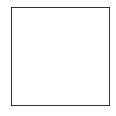

In [12]:
#Iterate thru all the layers of the model
for layer in loaded_model.layers:
    if 'conv3d' in layer.name:
        weights= layer.get_weights()
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        print(layer.name, filters.shape)

        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [26]:
for layer in loaded_model.layers:
    if 'conv3d' in layer.name:
      weights=layer.get_weights()
      print(weights)
      filters = weights
      filter_cnt=1
      #plotting all the filters
      for i in range(1, 64):
          #get the filters
          filt=filters[:,:,:, i]
          #plotting each of the channel, color image RGB channels
          for j in range(filters.shape[0]):
              ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
              ax.set_xticks([])
              ax.set_yticks([])
              plt.imshow(filt[:,:, j])
              filter_cnt+=1
      plt.show()


[array([[[[[-0.04895227, -0.01546095, -0.00076302, ...,  0.00895266,
            0.01666821,  0.02881686]],

         [[-0.04165991,  0.02981711, -0.02019708, ..., -0.01888132,
            0.04803039,  0.02783479]],

         [[ 0.03854174,  0.03137143, -0.0141106 , ...,  0.02011078,
           -0.04487712,  0.03132398]]],


        [[[-0.00177989, -0.044255  , -0.00348336, ...,  0.00426409,
            0.00698789,  0.03551538]],

         [[-0.05857711,  0.04715712,  0.00619965, ...,  0.02637679,
           -0.0348344 , -0.04723981]],

         [[ 0.01374852,  0.02108836,  0.05614468, ...,  0.02708124,
           -0.03134118,  0.00136068]]],


        [[[-0.03243455,  0.03620286,  0.04229563, ..., -0.01553078,
            0.04787356,  0.05061073]],

         [[-0.01240892, -0.05031903,  0.02580589, ...,  0.04505393,
           -0.0004823 , -0.03117894]],

         [[ 0.02371151,  0.01553078, -0.03349576, ...,  0.03950723,
           -0.00457712, -0.04278263]]]],



       [[[[-0.03296

TypeError: ignored

(3, 3, 3, 1, 64)
(3, 3, 3, 64, 64)
(3, 3, 3, 64, 128)
(3, 3, 3, 128, 256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


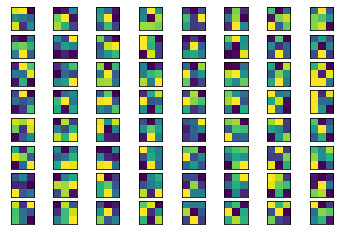

In [53]:
for layer in loaded_model.layers:
    if 'conv3d' in layer.name:
      weights=layer.get_weights()
      filters=weights[0]
      print(filters.shape)
      #plotting all the filters
      filter_cnt=1
      for i in range(0,64):
        #get the filters
        ax= plt.subplot(8, 8, filter_cnt)
        filter_cnt=filter_cnt+1
        filt=filters[:,:,0,0,i]
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(filt) 

(3, 3, 3, 1, 64)
(3, 3, 3, 64, 64)
(3, 3, 3, 64, 128)
(3, 3, 3, 128, 256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


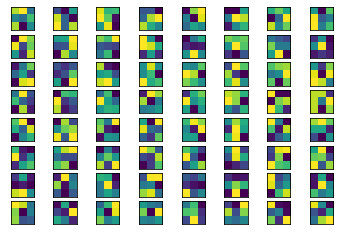

In [52]:
for layer in loaded_model.layers:
    if 'conv3d' in layer.name:
      weights=layer.get_weights()
      filters=weights[0]
      print(filters.shape)
      #plotting all the filters
      filter_cnt=1
      for i in range(0,64):
        #get the filters
        ax= plt.subplot(8, 8, filter_cnt)
        filter_cnt=filter_cnt+1
        filt=filters[:,0,:,0,i]
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(filt) 

(3, 3, 3, 1, 64)
(3, 3, 3, 64, 64)
(3, 3, 3, 64, 128)
(3, 3, 3, 128, 256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


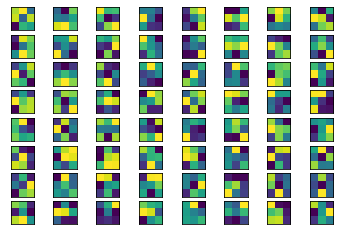

In [54]:
for layer in loaded_model.layers:
    if 'conv3d' in layer.name:
      weights=layer.get_weights()
      filters=weights[0]
      print(filters.shape)
      #plotting all the filters
      filter_cnt=1
      for i in range(0,64):
        #get the filters
        ax= plt.subplot(8, 8, filter_cnt)
        filter_cnt=filter_cnt+1
        filt=filters[0,:,:,0,i]
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(filt) 